In [340]:
import time
from tqdm import tqdm

import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

In [341]:
data_path = "/home/sharedrive/ids_dataset/early_detection/data_vary_N/rf_data/packet_6/n_5/"

### RF training with n=1

In [342]:
# data_path = "/home/sharedrive/ids_dataset/early_detection/data_vary_N/n_1/"

In [343]:
# for comparing rf vs lstm
X_train, y_train = np.load(data_path+"X_train_n_5.npy", allow_pickle=True), np.load(data_path+"y_train_n_5.npy", allow_pickle=True)
X_test, y_test = np.load(data_path+"X_test_n_5.npy", allow_pickle=True), np.load(data_path+"y_test_n_5.npy", allow_pickle=True)

In [344]:
# for comparing different rf model on the same test data
# data_path = "/home/sharedrive/ids_dataset/early_detection/data_vary_N/n_5/"
# X_test, y_test = np.load(data_path+"X_test_n_5.npy", allow_pickle=True), np.load(data_path+"y_test_n_5.npy", allow_pickle=True)

In [345]:
y_train_series = pd.Series(y_train, name="Label") 
y_test_series = pd.Series(y_test, name="Label") 

In [346]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [347]:
# # balancing data
# train_attack = 1985
# train_benign = 23925
# # test_attack = 800
# # test_benign = 10210

# train_attack_idx = y_train_series=='attack'
# train_benign_idx = y_train_series=='benign'
# attack_x_train = X_train[train_attack_idx][:train_attack]
# benign_x_train = X_train[train_benign_idx][:train_benign]
# attack_y_train = y_train[train_attack_idx][:train_attack]
# benign_y_train = y_train[train_benign_idx][:train_benign]
# X_train = np.concatenate((attack_x_train, benign_x_train), axis=0)
# y_train = np.concatenate((attack_y_train, benign_y_train), axis=0)

# # test_attack_idx = y_test_series=='attack'
# # test_benign_idx = y_test_series=='benign'
# # attack_x_test = X_test[test_attack_idx][:test_attack]
# # benign_x_test = X_test[test_benign_idx][:test_benign]
# # attack_y_test = y_test[test_attack_idx][:test_attack]
# # benign_y_test = y_test[test_benign_idx][:test_benign]
# # X_test = np.concatenate((attack_x_test, benign_x_test), axis=0)
# # y_test = np.concatenate((attack_y_test, benign_y_test), axis=0)

# y_train_series = pd.Series(y_train, name="Label") 

In [348]:
print("Test Size\n", y_test_series.value_counts())
print("Train Size\n", y_train_series.value_counts())

Test Size
 benign    9210
attack     690
Name: Label, dtype: int64
Train Size
 benign    21625
attack     1395
Name: Label, dtype: int64


<AxesSubplot: >

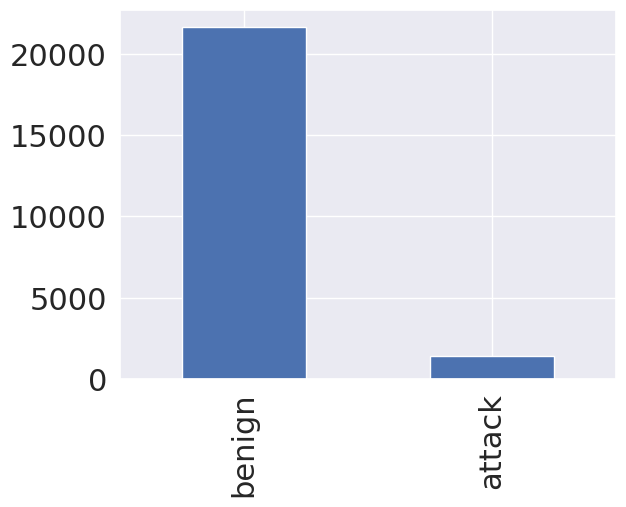

In [349]:
y_train_series.value_counts().plot(kind='bar')

In [350]:
# Label preparation for RandomForest
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [351]:
le.transform(["attack", "benign"])

array([0, 1])

In [352]:
RF_model = RandomForestClassifier()

In [353]:
# Train the model on training data
st = time.time()
RF_model.fit(X_train, y_train_encoded) #For sklearn no one hot encoding
print("Training time: ", time.time()-st)

#Now predict using the trained RF model. 
st = time.time()
prediction_RF = RF_model.predict(X_test)
print("inference time per sample: ", (time.time()-st)/len(X_test))
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

Training time:  1.4566943645477295
inference time per sample:  4.315930183487709e-06


Accuracy =  0.9872
Precision =  0.9667
Recall =  0.9321
F1 =  0.9486
[[ 599   91]
 [  36 9174]]


<AxesSubplot: >

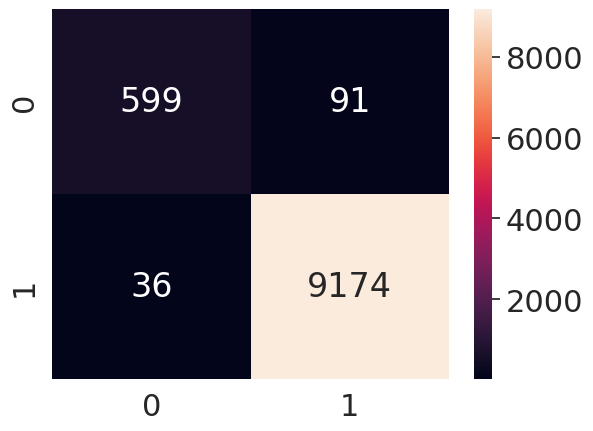

In [354]:
#Print overall accuracy
print("Accuracy = ", round(metrics.accuracy_score(y_test, prediction_RF), 4))
print("Precision = ", round(metrics.precision_score(y_test, prediction_RF, average='macro'),4))
print("Recall = ", round(metrics.recall_score(y_test, prediction_RF, average='macro'),4))
print("F1 = ", round(metrics.f1_score(y_test, prediction_RF, average='macro'), 4))
#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(y_test, prediction_RF) # tn, fp, fn, tp
print(cm)
sns.heatmap(cm, annot=True, fmt='.10g')